In [1]:
import matplotlib.pyplot as plt
from molass.Local import get_local_settings
local_settings = get_local_settings()
ORIGINAL_DATA = local_settings['ORIGINAL_DATA']
print(ORIGINAL_DATA)

C:\Users\takahashi\PyTools\Data\sample_data


# Trimming

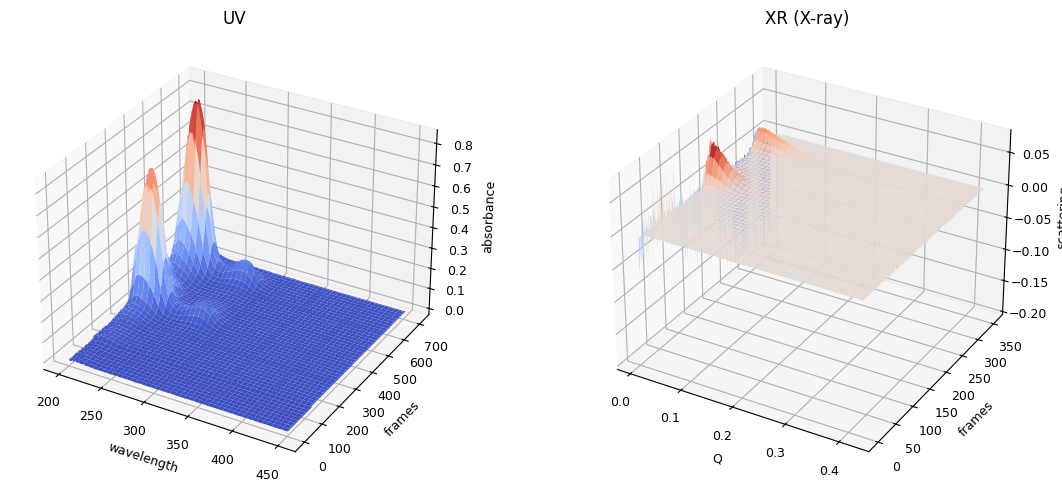

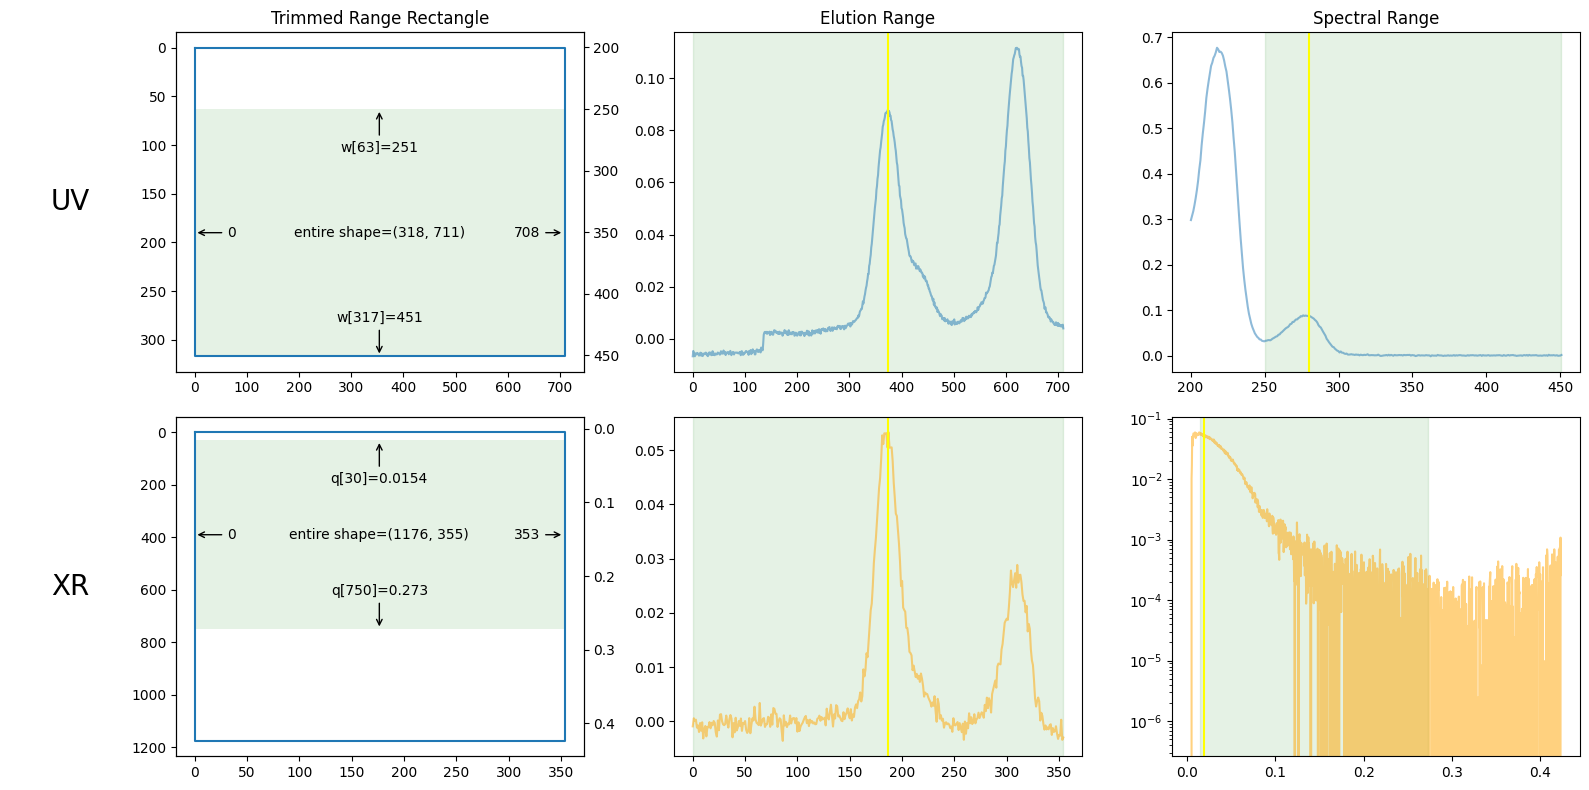

In [2]:
from molass.Global.Options import set_molass_options
from molass.DataObjects import SecSaxsData as SSD
set_molass_options(flowchange=True)
original_data_folder = ORIGINAL_DATA
ssd0 = SSD(original_data_folder)
ssd0.plot_3d()
plot_result0 = ssd0.plot_trimming();

In [3]:
plot_result0.trimming.xr_slices, plot_result0.trimming.uv_slices

((slice(30, 751, None), slice(0, 354, None)),
 (slice(63, None, None), slice(0, 709, None)))

In [4]:
import os
import tempfile
import shutil
from importlib import reload
import molass.DataUtils.UvFileTrimming
reload(molass.DataUtils.UvFileTrimming)
from molass.DataUtils.UvFileTrimming import trim_uvfile

# Define the temporary directory name
temp_dir = os.path.join(tempfile.gettempdir(), "tutorial_data")

# Clear the directory if it already exists
if os.path.exists(temp_dir):
    shutil.rmtree(temp_dir)

# Create the temporary directory
os.makedirs(temp_dir)

print(f"Temporary directory created at: {temp_dir}")

uv_filename = "SAMPLE_UV280_01.txt"
in_uvfile = os.path.join(original_data_folder, uv_filename)
trimmed_uvfile = os.path.join(temp_dir, uv_filename)
jslice = plot_result0.trimming.uv_slices[1]
trim_uvfile(in_uvfile,
            (slice(None, None), jslice),    # slicing only the second axis
            trimmed_uvfile)

Temporary directory created at: C:\Users\TAKAHA~1\AppData\Local\Temp\tutorial_data


In [5]:
import os
import re
from molass.DataUtils.ZipFolder import zip_folder

from glob import glob
xr_islice = plot_result0.trimming.xr_slices[1]
start, stop = xr_islice.start, xr_islice.stop
n = 0
for k, path in enumerate(glob(original_data_folder + "/*.dat")):
    if k >= start and k < stop:
        basename = re.sub(r"_\d{5}_sub", "_%05d_"%n, os.path.basename(path))
        target_path = os.path.join(temp_dir, basename)
        shutil.copy(path, target_path)
        # print([k], "copying from %s to %s" % (path, basename))
        n += 1

# Define the zip file name
zip_file = os.path.join(tempfile.gettempdir(), "tutorial_data.zip")

# # Zip the temp folder to zip_file
zip_folder(temp_dir, zip_file)

print(f"Temporary directory zipped at: {zip_file}")

Temporary directory zipped at: C:\Users\TAKAHA~1\AppData\Local\Temp\tutorial_data.zip


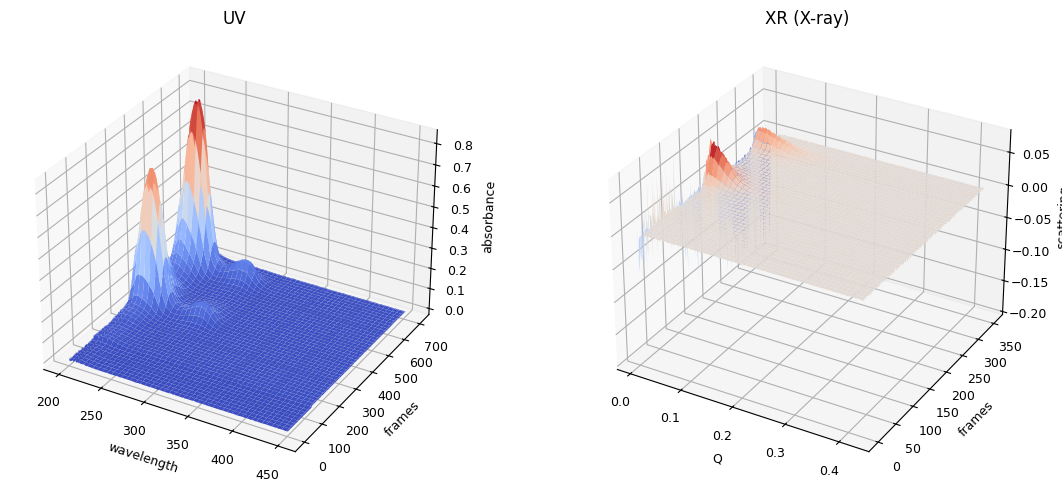

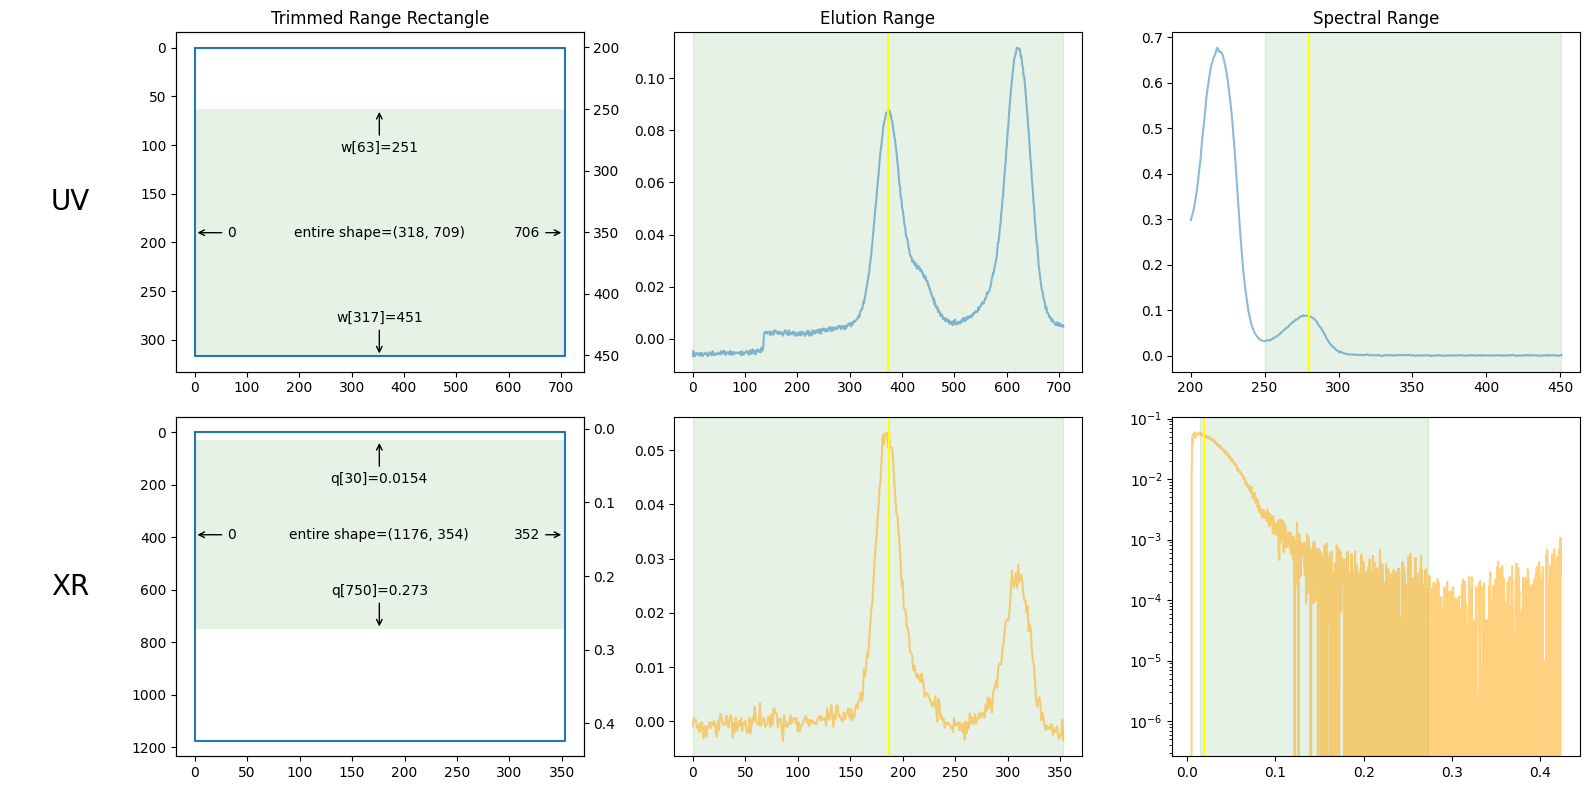

In [6]:
ssd1 = SSD(temp_dir)
ssd1.plot_3d()
plot_result1 = ssd1.plot_trimming();

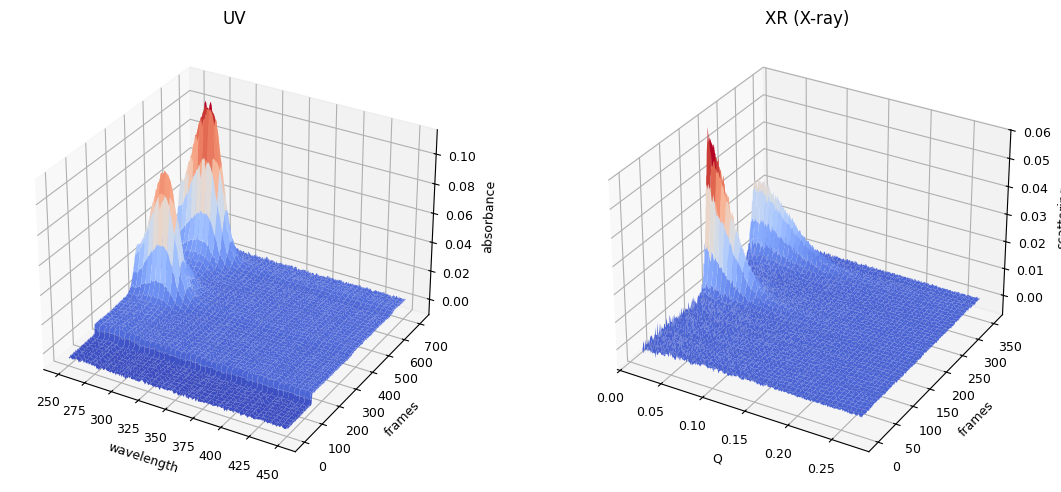

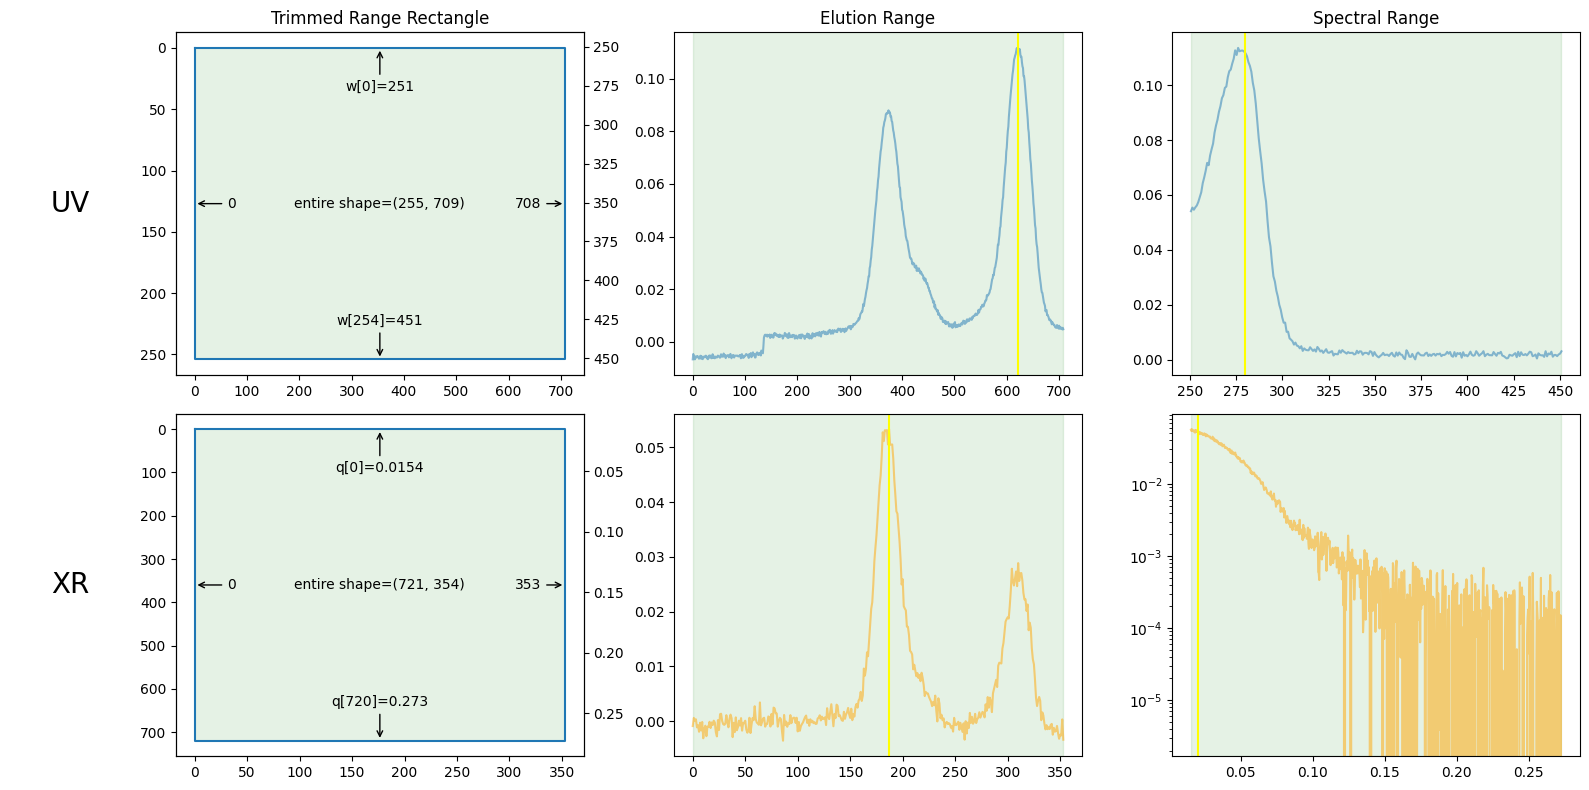

In [7]:
ssd2 = ssd0.trimmed_copy()
ssd2.plot_3d()
ssd2.plot_trimming()

c:\Program Files\Python312\Lib\site-packages\molass\PlotUtils\DecompositionPlot.py:88: RuntimeWarning: invalid value encountered in log
  logy = np.log(pv[slice_])


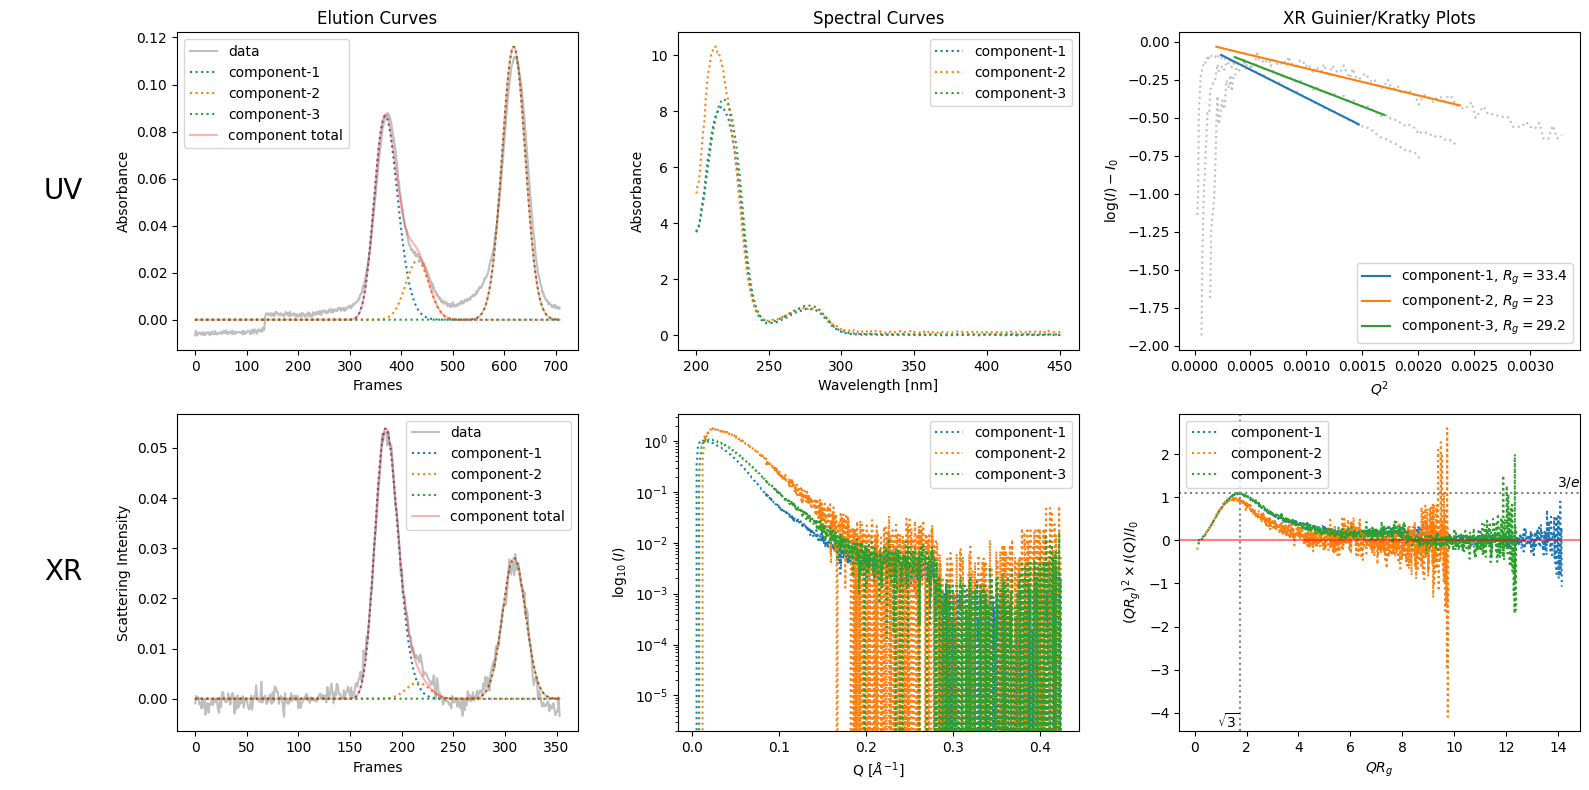

In [8]:
decomposition = ssd1.quick_decomposition(num_components=3, consistent_uv=True)
decomposition.plot_components();
    

In [9]:
for i, ccurve in enumerate(decomposition.xr_ccurves):
    print([i], ccurve.params)

[0] [5.39084558e-02 1.84603595e+02 1.12014356e+01 2.63242400e+00]
[1] [3.24981427e-03 2.15604286e+02 1.12014590e+01 2.89884113e-03]
[2] [ 2.80593003e-02  3.08844949e+02  1.12036131e+01 -9.50185654e-04]


In [10]:
for i, ccurve in enumerate(decomposition.uv_ccurves):
    print([i], ccurve.params)

[0] [8.66883372e-02 3.69187706e+02 2.24939397e+01 5.28624981e+00]
[1] [2.51728191e-02 4.31441127e+02 2.24939867e+01 5.82125008e-03]
[2] [ 1.16057562e-01  6.18680508e+02  2.24983125e+01 -1.90809639e-03]
